In [32]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
from PIL import Image
import seaborn as sn
import matplotlib.pyplot as plt
import os
from natsort import natsorted
from tqdm import tqdm
import cv2
import glob
import skvideo.io



from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram





In [17]:
# import pandas as pd

# Assuming 'file_paths' is a dictionary with keys as names and values as file paths
file_paths = {
    '11': '/Users/julianna/Desktop/kinematic_df/11.csv',
    '12': '/Users/julianna/Desktop/kinematic_df/12.csv',
    '13': '/Users/julianna/Desktop/kinematic_df/13.csv',
    '14': '/Users/julianna/Desktop/kinematic_df/14.csv',
    '15': '/Users/julianna/Desktop/kinematic_df/15.csv',
    '19': '/Users/julianna/Desktop/kinematic_df/19.csv',
    '21': '/Users/julianna/Desktop/kinematic_df/21.csv',
    '22': '/Users/julianna/Desktop/kinematic_df/22.csv',
    '23': '/Users/julianna/Desktop/kinematic_df/23.csv',
    '24': '/Users/julianna/Desktop/kinematic_df/24.csv',
    '29': '/Users/julianna/Desktop/kinematic_df/29.csv',
    '30': '/Users/julianna/Desktop/kinematic_df/30.csv',
    '35': '/Users/julianna/Desktop/kinematic_df/35.csv',
    '36': '/Users/julianna/Desktop/kinematic_df/36.csv',
    '38': '/Users/julianna/Desktop/kinematic_df/38.csv',
    '47': '/Users/julianna/Desktop/kinematic_df/47.csv',
    '52': '/Users/julianna/Desktop/kinematic_df/52.csv',
    '54': '/Users/julianna/Desktop/kinematic_df/54.csv',
    '60': '/Users/julianna/Desktop/kinematic_df/60.csv',
    '82': '/Users/julianna/Desktop/kinematic_df/82.csv'
}

# Initialize an empty dictionary to hold your DataFrames
kinematic_dataframes = {}

# Loop over the file_paths dictionary and read each CSV file into a DataFrame
for name, file_path in file_paths.items():
    kinematic_dataframes[name] = pd.read_csv(file_path)

# Now 'kinematic_dataframes' is a dictionary with keys as names and values as DataFrames


In [19]:

# Assuming 'file_paths' is a dictionary with keys as names and values as file paths
file_paths =  {'11': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_11.csv',
 '12': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_12.csv',
 '13': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_13.csv',
 '14': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_14.csv',
 '15': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_15.csv',
 '19': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_19.csv',
 '21': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_21.csv',
 '22': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_22.csv',
 '23': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_23.csv',
 '24': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_24.csv',
 '29': '//Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_29.csv',
 '30': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_30.csv',
 '35': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_35.csv',
 '36': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_36.csv',
 '38': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_38.csv',
 '47': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_47.csv',
 '52': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_52.csv',
 '54': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_54.csv',
 '60': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_60.csv',
 '82': '/Users/julianna/Desktop/kinematic_df/complex_ALH_calc/participant_82.csv'}

# Initialize an empty dictionary to hold your DataFrames
complex_ALH_calc = {}

# Loop over the file_paths dictionary and read each CSV file into a DataFrame
for name, file_path in file_paths.items():
    complex_ALH_calc[name] = pd.read_csv(file_path)

# Now 'kinematic_dataframes' is a dictionary with keys as names and values as DataFrames

In [20]:
complex_ALH_calc

{'11':                           fid      ALH Mean       ALH Max
 0   ckz3v9nzv00033867jsekqdcl  0.000000e+00  0.000000e+00
 1   ckz6ru2eb0001386lefk6js4m  0.000000e+00  0.000000e+00
 2   ckz6ru3um0003386l39xwv0yk  0.000000e+00  0.000000e+00
 3   ckz6ru5610005386l8uoys4lc  0.000000e+00  0.000000e+00
 4   ckz6ru6of0007386lhf2t4dtw  0.000000e+00  0.000000e+00
 5   ckz6ru83f0009386lx7517dwf  0.000000e+00  0.000000e+00
 6   ckz6ru99l000b386l18xh2byu  0.000000e+00  0.000000e+00
 7   ckz6rub67000d386ld3mx1dyi  1.506030e+09  2.209345e+12
 8   ckz6ruchb000f386lxxpeu5na  0.000000e+00  0.000000e+00
 9   ckz6rudsb000h386lkwwvc8dz  0.000000e+00  0.000000e+00
 10  ckz6ruf3e000j386lbyqpxw51  0.000000e+00  0.000000e+00
 11  ckz6rugcj000l386lzjazem8c  9.727881e-02  6.123336e+00
 12  ckz6rui7o000n386lh32dwmkr  0.000000e+00  0.000000e+00
 13  ckz6ruj49000p386lndk3j9jv  3.942243e-05  3.196413e-02
 14  ckz6rup8s000r386lkjotnoh0  0.000000e+00  0.000000e+00
 15  ckz6rurv1000t386llsdca8lh  3.246786e-01  2.15

In [21]:
# alh_summary = simple_ALH_calc['12']
desired_columns = ['fid', 'ALH Mean', 'ALH Max']
df = complex_ALH_calc['21'][desired_columns]
df = df.groupby('fid').first()

original_df = kinematic_dataframes['21']

merged_df = original_df.merge(df, on='fid', how='left')

merged_df
# simple_ALH_calc['12'] = simple_ALH_calc[desired_columns]
# groupby('fid')['ALH Mean', 'ALH Max'].first()
# alh_summary.columns = ['fid', 'ALH Mean', 'ALH Max']


,fid,total_displacement,VSL,total_frames,frames_present_by_fid,total_distance,VCL,VAP,class,WOB,LIN,STR,ALH Mean,ALH Max
0,ckz3vwyqh000r3867ejpqrh3v,37.340517,2.433092,1470,753,50.081257,3.258940,3.204037,0,98.315318,74.659013,75.938332,0.000000,0.000000
1,cl3l9s21y00043r6c9z22mg77,15.866194,1.033834,1470,753,16.515514,1.074715,1.063524,0,98.958772,96.196175,97.208335,0.000000,0.000000
2,cl3l9sbf400083r6cvbbylvw8,425.907935,83.477955,1470,251,962.542668,187.906736,118.987183,2,63.322468,44.425206,70.157099,0.180161,25.709111
3,cl3l9sibg000c3r6cny8ys6gz,58.481954,3.810659,1470,753,73.534924,4.785141,4.702629,0,98.275661,79.635252,81.032528,0.000036,0.026795
4,cl3l9sm3z000g3r6c1mykp9ux,6.588078,0.429276,1470,753,6.588078,0.428706,0.375118,0,87.500000,100.132979,114.437690,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,cl3lk7rxk008e3r6cvl9tfyaz,670.551830,124.458484,1470,265,1031.560166,190.741314,138.949817,0,72.847258,65.249883,89.570815,0.082837,9.095538
76,cl3lkeq6n008i3r6cdzw9qe25,20.833333,170.138889,1470,7,20.833333,145.833333,0.000000,0,0.000000,116.666667,0.000000,0.000000,0.000000
77,cl3lkfleb008m3r6c4f15engp,328.719699,96.450690,1470,168,630.973761,184.034014,111.591087,0,60.636121,52.409165,86.432253,0.132960,8.047793
78,cl522yttk000b3r6gtxj0zvyx,9.316950,0.607088,1470,753,9.316950,0.606282,0.602186,2,99.324324,100.132979,100.814155,0.000000,0.000000


# KMeans Clustering

In [23]:
desired_columns = ['fid', 'ALH Mean', 'ALH Max']

# Initialize an empty dictionary to store the merged DataFrames
merged_kinematic_dataframes = {}

# Loop through the participant keys in kinematic_dataframes
for participant_key in kinematic_dataframes.keys():
    # Check if the participant_key exists in simple_ALH_calc
    if participant_key in complex_ALH_calc:
        # Get the corresponding ALH DataFrame
        df = complex_ALH_calc[participant_key][desired_columns]
        df = df.groupby('fid').first()

        # Get the original kinematic DataFrame
        original_df = kinematic_dataframes[participant_key]

        # Merge the ALH values into the kinematic DataFrame
        merged_df = original_df.merge(df, on='fid', how='left')

        # Store the merged DataFrame in the new dictionary
        merged_kinematic_dataframes[participant_key] = merged_df
    else:
        print(f"Warning: Participant {participant_key} not found in simple_ALH_calc")

# merged_kinematic_dataframes will contain the kinematic DataFrames with the ALH values merged for matching participants


In [24]:
all_participant_data = []


for participant_key, df in merged_kinematic_dataframes.items():
    # Add a new column 'Participant' with the participant key
    df['Participant'] = participant_key
    # Append the DataFrame to the list
    all_participant_data.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat(all_participant_data, ignore_index=True)

In [25]:
combined_data

,fid,total_displacement,VSL,total_frames,frames_present_by_fid,total_distance,VCL,VAP,class,WOB,LIN,STR,ALH Mean,ALH Max,Participant
0,ckz3v9nzv00033867jsekqdcl,27.163343,0.906061,1470,1470,28.216674,0.940556,0.932249,0,99.116782,96.332523,97.190931,0.000000,0.000000,11
1,ckz6ru2eb0001386lefk6js4m,6.250000,0.208475,1470,1470,6.250000,0.208333,0.203932,0,97.887324,100.068074,102.227816,0.000000,0.000000,11
2,ckz6ru3um0003386l39xwv0yk,11.785113,0.393105,1470,1470,13.483617,0.449454,0.442259,0,98.399230,87.462703,88.885557,0.000000,0.000000,11
3,ckz6ru5610005386l8uoys4lc,0.000000,0.000000,1470,1470,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,11
4,ckz6ru6of0007386lhf2t4dtw,0.000000,0.000000,1470,1470,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,cl4za4fnb000g3y6frpvd1jm6,0.000000,0.000000,1500,718,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,82
1172,cl4zaco4r000k3y6fa7pk88t5,0.000000,0.000000,1500,718,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,82
1173,cl5mo9vaj00033b6gb6jraptt,28.603188,1.994644,1500,718,32.682319,2.275928,2.230257,2,97.993308,87.640907,89.435604,0.000033,0.020139,82
1174,cl5modn3m000a3b6gto9tq5oy,35.554267,2.479377,1500,718,35.875319,2.498281,2.480012,2,99.268722,99.243311,99.974401,0.000019,0.010057,82


For n_clusters = 2, the average silhouette score is : 0.513
The value at the red dotted line for n_clusters = 2 is: 0.513
For n_clusters = 3, the average silhouette score is : 0.471
The value at the red dotted line for n_clusters = 3 is: 0.471
For n_clusters = 4, the average silhouette score is : 0.487
The value at the red dotted line for n_clusters = 4 is: 0.487
For n_clusters = 5, the average silhouette score is : 0.453
The value at the red dotted line for n_clusters = 5 is: 0.453


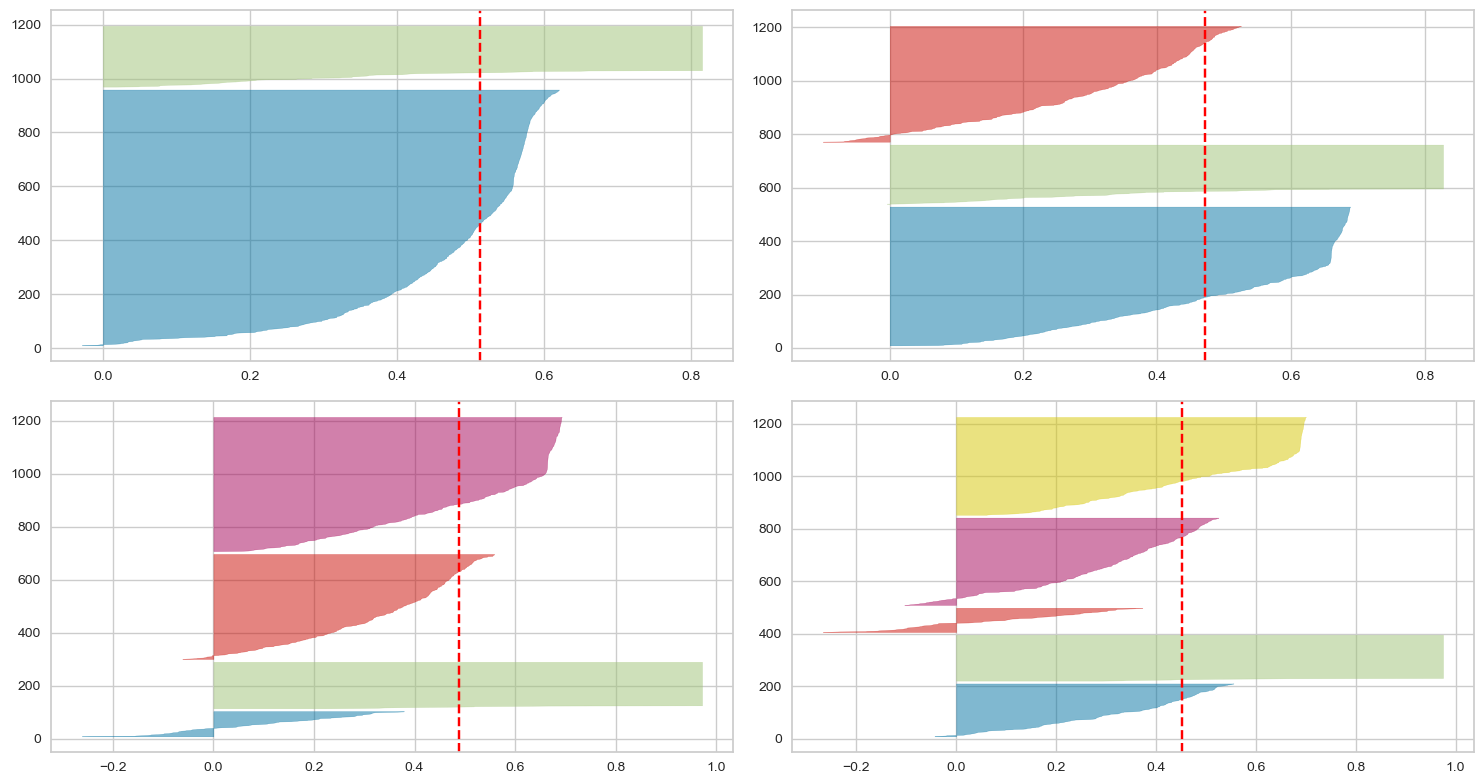

In [26]:

# Define the columns to keep
columns_to_keep = ['VCL', 'VAP', 'VSL', 'LIN', 'WOB', 'STR','ALH Mean', 'ALH Max']

# Select only the specified columns
features = combined_data[columns_to_keep].fillna(0)

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)





fig, ax = plt.subplots(2, 2, figsize=(15,8)) # Adjust this line for a 2x2 grid
for i, n_clusters in enumerate([2, 3, 4, 5], start=1):
    # Note the change to the loop variable and the start parameter in enumerate
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)
    
    # Calculate the grid position for the current subplot
    row = (i-1) // 2
    col = (i-1) % 2

    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[row][col])
    visualizer.fit(scaled_features)
    
    silhouette_avg = silhouette_score(scaled_features, km.labels_)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is : {silhouette_avg:.3f}")
    
    # To access the value at the red dotted line, which is the average silhouette score,
    # we use the silhouette_score_ attribute from visualizer
    red_dotted_line_value = visualizer.silhouette_score_
    print(f"The value at the red dotted line for n_clusters = {n_clusters} is: {red_dotted_line_value:.3f}")

# Adjust layout
plt.tight_layout()
plt.show() # Make sure to call plt.show() to display the plots


1176


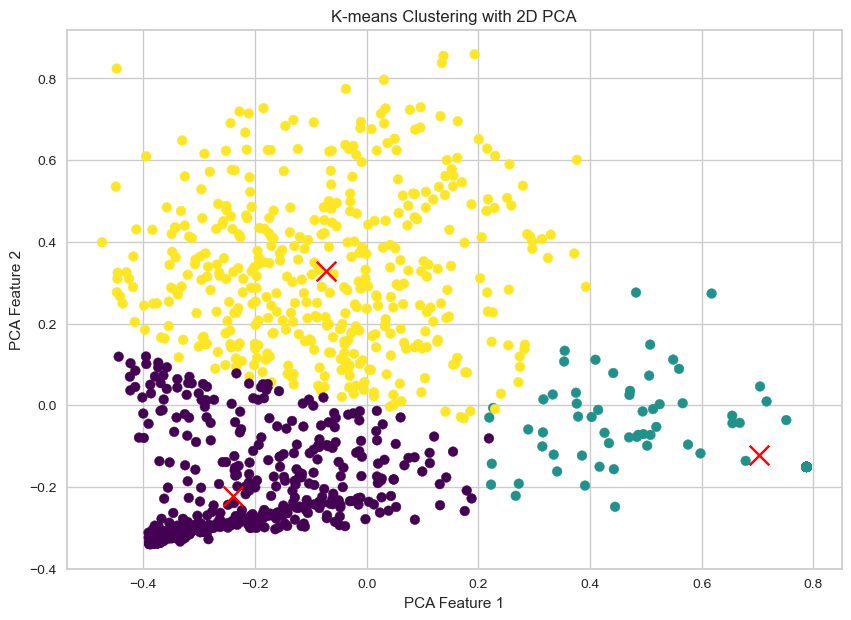

In [27]:
n_clusters = 3 # Just as an example, replace with the number you determined
km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=100, random_state=42)

# Assuming 'scaled_features' is an array-like object containing your scaled data
km.fit(scaled_features)
# Fit the model
km.fit(scaled_features)

# Predict the clusters
labels = km.predict(scaled_features)



pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
print(len(reduced_features))
# Predict cluster indices for each point in the reduced feature space
cluster_labels = km.predict(scaled_features)

# Plot the reduced data points with different colors for each cluster
plt.figure(figsize=(10, 7))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', marker='o')

# Plot the cluster centroids
centroids = pca.transform(km.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')

# Set plot title and axis labels
plt.title('K-means Clustering with 2D PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')

# Show plot
plt.show()

In [28]:
labels = km.predict(scaled_features)

# Add the cluster labels to your DataFrame
combined_data['Cluster'] = labels

# Now, you can safely select numeric data and exclude unnecessary columns
numeric_data = combined_data.select_dtypes(include=[np.number]).drop(['frames_present_by_fid', 'total_distance', 'total_frames', 'class', 'total_displacement'], axis=1)

# Group by 'Cluster' and calculate mean for numeric columns
cluster_means = numeric_data.groupby('Cluster').mean()

# Print the cluster means
cluster_means

,VSL,VCL,VAP,WOB,LIN,STR,ALH Mean,ALH Max
Cluster,,,,,,,,
0,16.678871,23.583250,20.095106,90.753302,71.442599,80.132385,2.896211e+06,4.248741e+09
1,26.805400,39.248551,3.727543,2.859798,18.450601,48.475828,1.018686e-01,6.852075e-01
2,97.538437,204.360829,136.488284,71.083514,47.476317,75.382478,9.695898e-02,6.829979e+00


In [29]:
participants_in_clusters = combined_data.groupby('Cluster')['Participant'].unique()

# Print the participants for each cluster
for cluster, participants in participants_in_clusters.items():
    print(f"Cluster {cluster}: {participants}")

Cluster 0: ['11' '12' '13' '14' '15' '19' '21' '22' '23' '24' '29' '30' '35' '36'
 '38' '47' '52' '54' '60' '82']
Cluster 1: ['11' '12' '13' '14' '15' '19' '21' '22' '23' '24' '29' '30' '35' '36'
 '38' '47' '52' '54' '60' '82']
Cluster 2: ['11' '12' '13' '14' '15' '19' '21' '22' '23' '24' '29' '30' '35' '36'
 '38' '47' '52' '54' '60' '82']


In [34]:
# Create a pivot table
pivot_table = combined_data.pivot_table(index='Participant', columns='Cluster', aggfunc='size', fill_value=0)

# Display the pivot table
# print(pivot_table)

# Group by 'Participant' and 'Cluster' and count data points
grouped_data = combined_data.groupby(['Participant', 'Cluster']).size().unstack(fill_value=0)

# Display the grouped data
# grouped_data


In [95]:


# Directory to save the plots
directory = '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/'

# Ensure the directory exists
os.makedirs(directory, exist_ok=True)

plot_files = []
for column in numeric_data.columns.difference(['Cluster', 'fid']):  # Exclude 'Cluster' and 'fid' from the plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=kinematic_dataframes['21'])
    plt.title(f'Distribution of {column} by Cluster')
    
    plot_file_path = f'{directory}cluster_distribution_{column}.png'
    plt.savefig(plot_file_path)
    
    # Add the file path to the list for download
    plot_files.append(plot_file_path)

    # Close the plot to avoid display in the notebook
    plt.close()

plot_files



['/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_ALH Max.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_ALH Mean.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_LIN.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_STR.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_VAP.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_VCL.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_VSL.png',
 '/Users/julianna/Desktop/kinematic_df/distribution_plots/21/cluster_distribution_WOB.png']

# Hierarchical Clustering

In [ ]:
# Example DataFrame loading
# Replace this with the actual path to your CSV file
df = 

# Selecting motility metrics columns, replace with your actual column names
metrics = df[['VCL', 'VSL', 'VAP', 'ALH', 'BCF', 'STR', 'LIN']]  # Example metric columns

# # Normalize the metrics
# scaler = StandardScaler()
# metrics_scaled = scaler.fit_transform(metrics)

# # Perform hierarchical clustering
# Z = linkage(metrics_scaled, method='ward')

# # Visualize the dendrogram
# plt.figure(figsize=(10, 7))
# dendrogram(Z, labels=df.index)
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Sample index')
# plt.ylabel('Distance')
# plt.show()
